Implementing Umap Caveat

In [1]:
#Import statements 
import sklearn.datasets
from sklearn.datasets import fetch_openml
import sklearn

import umap
import umap.plot as uplot

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:14: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.sparse import csr_matrix, issparse
/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/numba/np

### When distances between cluster have meaning

In [2]:
# Load the digits data
mnist = fetch_openml('mnist_784', parser='auto')

# Normalize the digits data
mnist_data = mnist.data/255
mnist_label = mnist.target

In [3]:
mnist_umap = umap.UMAP()
embedding = mnist_umap.fit_transform(mnist_data)

/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

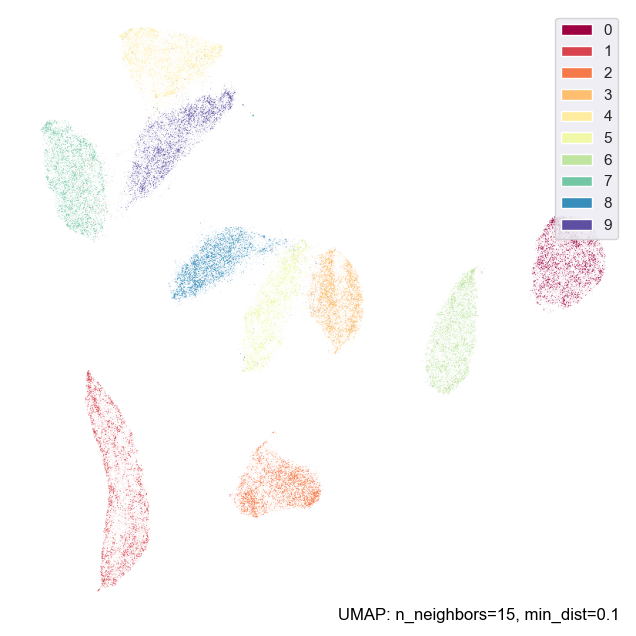

In [4]:
uplot.points(mnist_umap, labels=mnist_label)

<Axes: >

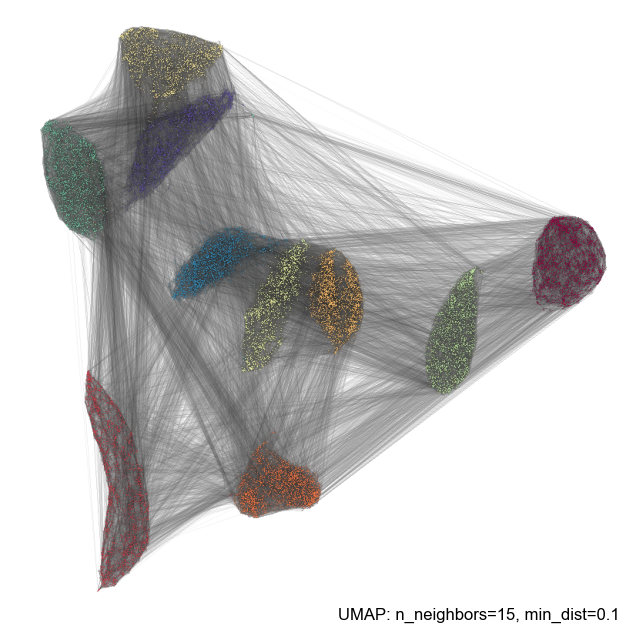

In [5]:
umap.plot.connectivity(mnist_umap, show_points=True,labels=mnist_label)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

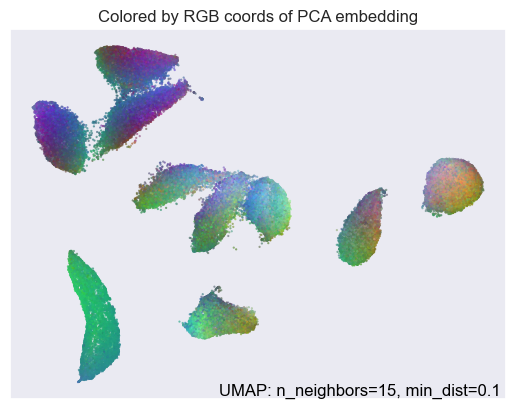

In [6]:
umap.plot.diagnostic(mnist_umap, diagnostic_type='pca')

### When distance between clusters is missleading

Text(0.5, 1.0, 'Original data')

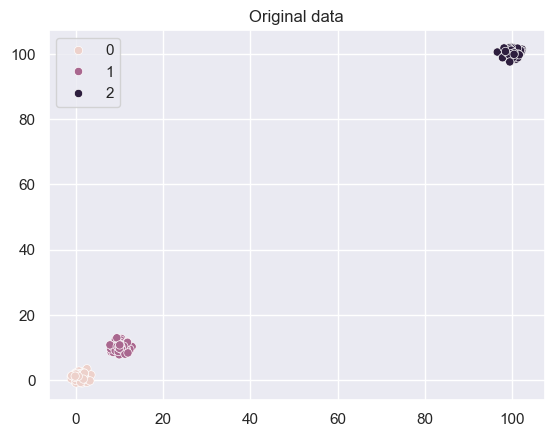

In [7]:
# Generate the dataset
blob_centers = [[1,1,1],[10,10,10], [100,100,100]]
blob_data, blob_ids = sklearn.datasets.make_blobs(
    n_samples=300, 
    n_features=3, 
    centers=blob_centers
)

sns.set_theme()
sns.scatterplot(x=blob_data[:,0], y=blob_data[:,1], hue=blob_ids)
plt.title('Original data')


/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

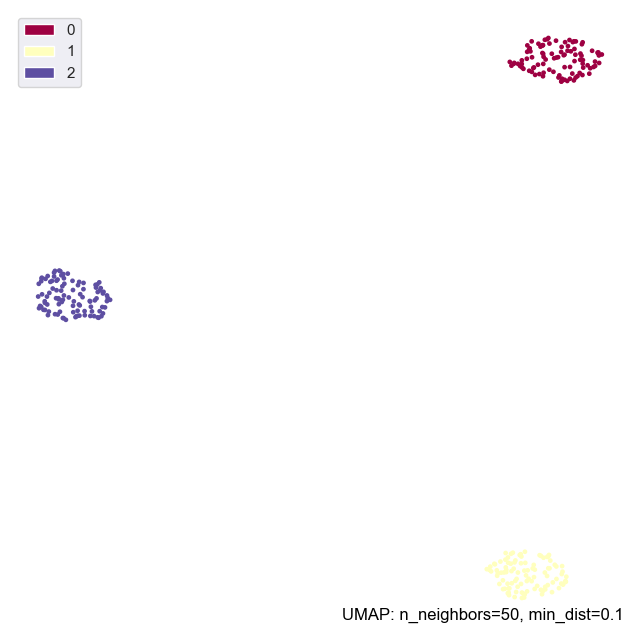

In [8]:
umap_obj_blobs = umap.UMAP(n_neighbors=50)
embedding_blobs = umap_obj_blobs.fit_transform(blob_data)

# Plot with visible densities and labels
uplot.points(umap_obj_blobs, labels=blob_ids)

<Axes: >

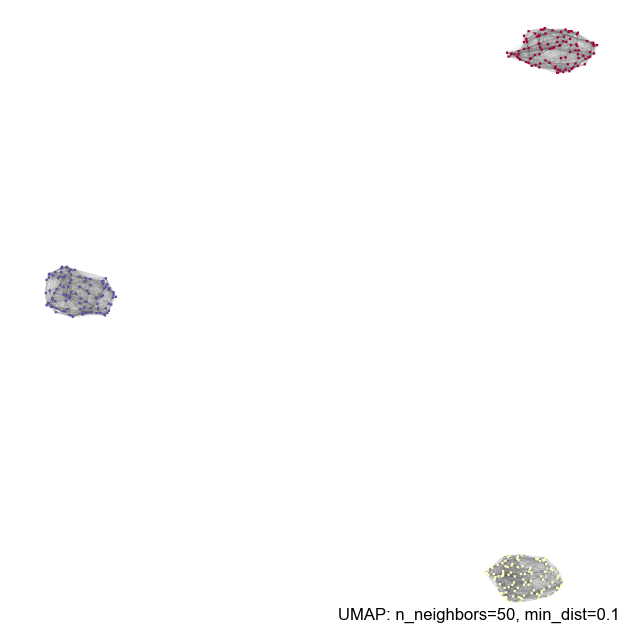

In [9]:
umap.plot.connectivity(umap_obj_blobs, show_points=True, labels=blob_ids)

<Axes: title={'center': 'Colored by RGB coords of PCA embedding'}>

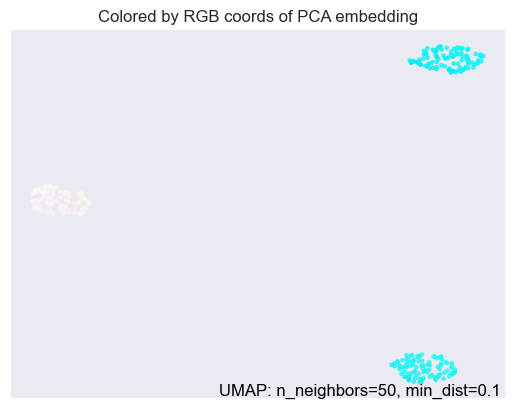

In [10]:
umap.plot.diagnostic(umap_obj_blobs, diagnostic_type='pca')

### When cluster size is missleading

Text(0.5, 1.0, 'Original data')

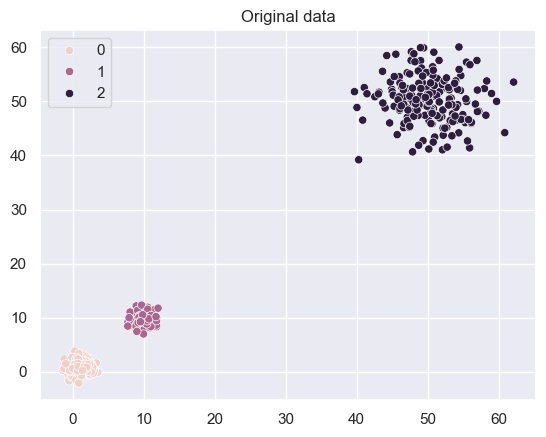

In [11]:
# Generate the dataset
blob_centers = [[1,1],[10,10], [50,50]]
blob_data, blob_ids = sklearn.datasets.make_blobs(
    n_samples=600, 
    n_features=2, 
    centers=blob_centers,
    cluster_std = [1,1,4]
)

sns.scatterplot(x=blob_data[:,0], y=blob_data[:,1], hue=blob_ids)
plt.title('Original data')

/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

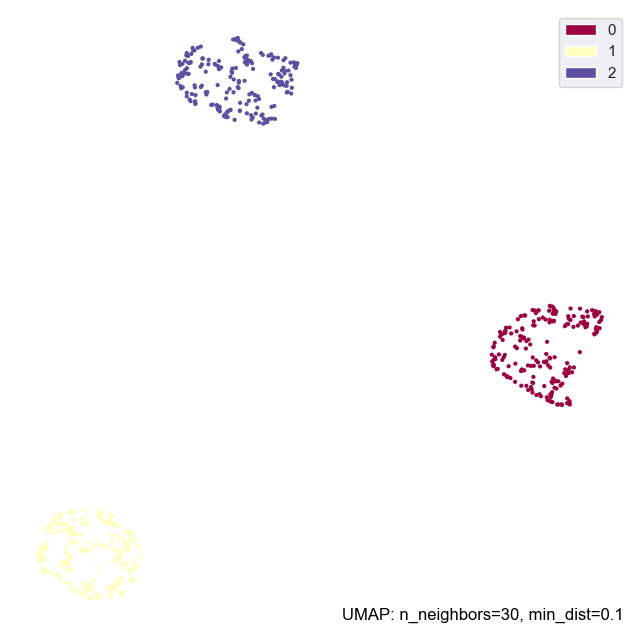

In [12]:
umap_obj_blobs = umap.UMAP(n_neighbors=30)
embedding_blobs = umap_obj_blobs.fit_transform(blob_data)

uplot.points(umap_obj_blobs, labels=blob_ids)

### random noise does not look random

In [13]:
# Generate the dataset
blob_centers = [[1,1]]
blob_data, blob_ids = sklearn.datasets.make_blobs(
    n_samples=600, 
    n_features=2, 
    centers=blob_centers,
    cluster_std = [10]
)

Text(0.5, 1.0, 'Original data')

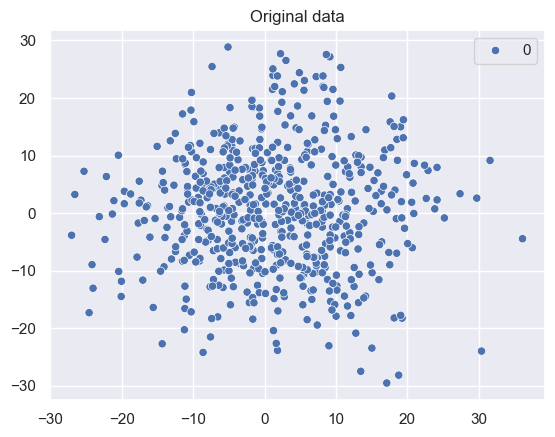

In [14]:
sns.set_theme()
sns.scatterplot(x=blob_data[:,0], y=blob_data[:,1], hue=blob_ids)
plt.title('Original data')

/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

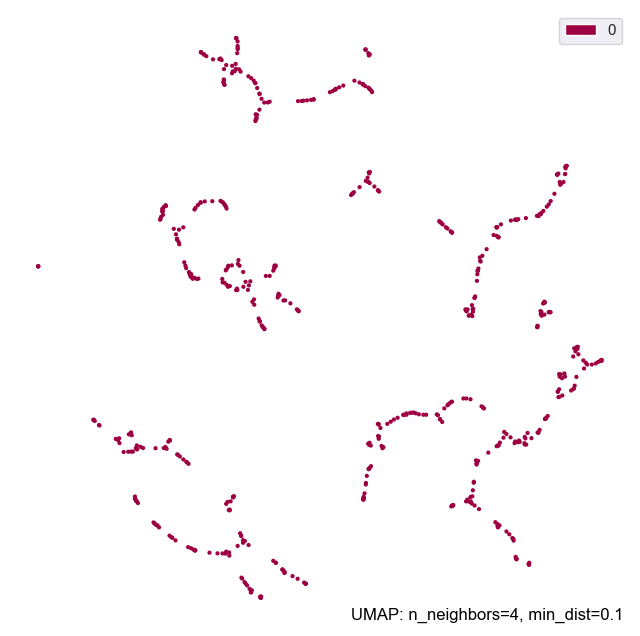

In [15]:
umap_obj_blobs = umap.UMAP(n_neighbors=4)
embedding_blobs = umap_obj_blobs.fit_transform(blob_data)

uplot.points(umap_obj_blobs, labels=blob_ids)